In [1]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from bs4 import BeautifulSoup
from nltk.corpus import stopwords 
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

In [2]:
nltk.download("punkt")
tqdm.pandas()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
# reading data from sample dataset
# data = pd.read_csv('amazon_pc.csv')
data = pd.read_csv('datasets/labelled.csv')
data.dropna(inplace=True)

In [10]:
data = data.drop(["Product Name","Brand Name", "Price","Review Votes"], axis=1)

array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

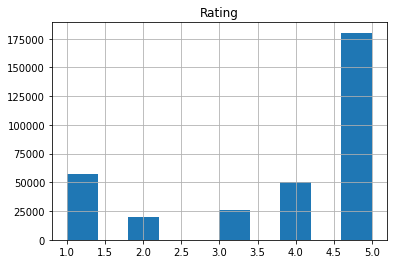

In [5]:
data.hist()

In [16]:
data = data.iloc[:100, :]

In [5]:
data.columns

Index(['Review', 'Summary', 'Sentiment'], dtype='object')

In [11]:
data.head()

,Rating,Reviews
0,5,I feel so LUCKY to have found this used (phone...
1,4,"nice phone, nice up grade from my pantach revu..."
2,5,Very pleased
3,4,It works good but it goes slow sometimes but i...
4,4,Great phone to replace my lost phone. The only...


In [7]:
data["Reviews"] = data['Review']+" " + data["Summary"]

In [12]:
data.head()

,Rating,Reviews
0,5,I feel so LUCKY to have found this used (phone...
1,4,"nice phone, nice up grade from my pantach revu..."
2,5,Very pleased
3,4,It works good but it goes slow sometimes but i...
4,4,Great phone to replace my lost phone. The only...


In [13]:
from nltk.stem import WordNetLemmatizer
def get_wordnet_pos(tag):
    from nltk.corpus import wordnet
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else: 
        return wordnet.NOUN

In [14]:
lemmatizer = WordNetLemmatizer()
def lemmatize(sentance):
    from nltk.tag import pos_tag
    tagged = pos_tag( [i for i in sentance if i])
    lemmatized = []
    for word, tag in tagged:
        lemma = lemmatizer.lemmatize(word, pos = get_wordnet_pos(tag))
        lemmatized.append(lemma)
    return lemmatized

In [17]:
data["ReviewsTokenized"] = data.progress_apply(lambda row: nltk.word_tokenize(row['Reviews']), axis=1)


100%|██████████| 100/100 [00:00<00:00, 1097.90it/s]
<ipython-input-17-efb2db6daa1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ReviewsTokenized"] = data.progress_apply(lambda row: nltk.word_tokenize(row['Reviews']), axis=1)


In [13]:
data.head()

,Review,Summary,Sentiment,Reviews,ReviewsTokenized
0,Very poor,problems 1 it gets auto defrost randomly anyti...,1,Very poor problems 1 it gets auto defrost rand...,"[Very, poor, problems, 1, it, gets, auto, defr..."
1,Moderate,freeze segment is tooo large so cooling segmen...,1,Moderate freeze segment is tooo large so cooli...,"[Moderate, freeze, segment, is, tooo, large, s..."
2,Nice,warranty sticker is not present when its run d...,1,Nice warranty sticker is not present when its ...,"[Nice, warranty, sticker, is, not, present, wh..."
3,Just okay,everything is goodworking fine but it is silly...,1,Just okay everything is goodworking fine but i...,"[Just, okay, everything, is, goodworking, fine..."
4,Decent product,refrigerator working fine but top and side vie...,1,Decent product refrigerator working fine but t...,"[Decent, product, refrigerator, working, fine,..."


In [18]:
data["ReviewsLemmatized"] = data.progress_apply(lambda row: lemmatize(row['ReviewsTokenized']), axis=1)


100%|██████████| 100/100 [00:02<00:00, 34.54it/s]
<ipython-input-18-dc2423d96c12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ReviewsLemmatized"] = data.progress_apply(lambda row: lemmatize(row['ReviewsTokenized']), axis=1)


In [19]:
data["ReviewsLemmatized1"] = data.progress_apply(lambda row: " ".join(row['ReviewsLemmatized']), axis=1)


100%|██████████| 100/100 [00:00<00:00, 21525.81it/s]
<ipython-input-19-88bb18bef17b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ReviewsLemmatized1"] = data.progress_apply(lambda row: " ".join(row['ReviewsLemmatized']), axis=1)


In [20]:
data.head()

,Rating,Reviews,ReviewsTokenized,ReviewsLemmatized,ReviewsLemmatized1
0,5,I feel so LUCKY to have found this used (phone...,"[I, feel, so, LUCKY, to, have, found, this, us...","[I, feel, so, LUCKY, to, have, find, this, use...",I feel so LUCKY to have find this use ( phone ...
1,4,"nice phone, nice up grade from my pantach revu...","[nice, phone, ,, nice, up, grade, from, my, pa...","[nice, phone, ,, nice, up, grade, from, my, pa...","nice phone , nice up grade from my pantach rev..."
2,5,Very pleased,"[Very, pleased]","[Very, pleased]",Very pleased
3,4,It works good but it goes slow sometimes but i...,"[It, works, good, but, it, goes, slow, sometim...","[It, work, good, but, it, go, slow, sometimes,...",It work good but it go slow sometimes but it a...
4,4,Great phone to replace my lost phone. The only...,"[Great, phone, to, replace, my, lost, phone, ....","[Great, phone, to, replace, my, lose, phone, ....",Great phone to replace my lose phone . The onl...


In [22]:
# #split data-set to train and test

X = data['ReviewsLemmatized']
Y = data['Rating']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [37]:
print(X_train)

286048           don t waste your money quality be not good
167847          good quality product a good quality a brand
263149    Simply awesome water heating time be perfect v...
201173                          worth every penny very cute
46322     just wow ! crompton ozone 88 cooler be amaze w...
                                ...                        
141211                                 value-for-money good
282419    Not recommend at all very bad never purchase t...
155173    terrific purchase good picture quality with hi...
170108                                   great product good
143290                                    excellent awesome
Name: ReviewsLemmatized1, Length: 214388, dtype: object


In [23]:
# function to remove html elements from the reviews
def removeHTML(raw_text):
    clean_HTML = BeautifulSoup(raw_text, 'lxml').get_text() 
    return clean_HTML

In [24]:
# function to remove special characters and numbers from the reviews4961
def removeSpecialChar(raw_text):
    clean_SpecialChar = re.sub("[^a-zA-Z]", " ", raw_text)  
    return clean_SpecialChar

In [25]:
# function to convert all reviews into lower case
def toLowerCase(raw_text):
    clean_LowerCase = raw_text.lower().split()
    return( " ".join(clean_LowerCase))  

In [26]:
# function to remove stop words from the reviews
def removeStopWords(raw_text):
    stops = set(stopwords.words("english"))
    words = [w for w in raw_text if not w in stops]
    return( " ".join(words))

In [27]:
# X_training clean set
X_train_cleaned = []

i=1
# X_train.to_csv("tsh.csv")
for val in tqdm(X_train):
    i+=1
#     print(val, type(val))
#     val = removeHTML(val)
    if(val!=np.nan):
#         print(type(val),i)
        val = removeSpecialChar(val)
        val = toLowerCase(val)
        removeStopWords(val) 
        X_train_cleaned.append(val) 

  0%|          | 0/80 [00:00<?, ?it/s]


TypeError: expected string or bytes-like object

In [35]:
print(X_train_cleaned[0:6])

['worth the money good', 'simply awesome water heating time is perfect very good product for person family must buy water remain hot for more that hours', 'perfect for a small home if you are not looking for cooking like a chef everyday this nice equipment will make your meal hot everyday without any fuss', 'decent product good air delivery this is its pro and con because of heavy air delivery you cannot use this as fan otherwise this is very good if you live in hot dessert area do not buy if you are from humid coastal area it is not effective by a powerful fan instead', 'good good but speakers only', 'not recommended at all machine very heating problem not safe i have replace the machine but this problem facing continue not good money waste time waste']


In [23]:
# X_testing clean set
X_test_cleaned = []

for val in tqdm(X_test):
#     val = removeHTML(val)
    val = removeSpecialChar(val)
    val = toLowerCase(val)
    removeStopWords(val)
    X_test_cleaned.append(val) 

100%|██████████| 82756/82756 [00:23<00:00, 3529.73it/s]


In [24]:
# Convert a collection of raw documents to a matrix of TF-IDF features. This is required so as to train the model using features instead of 
# raw strings.
tvec = TfidfVectorizer(use_idf=True,strip_accents='ascii')

X_train_tvec = tvec.fit_transform(X_train_cleaned)


In [25]:
X_test_tvec = tvec.transform(X_test_cleaned)

In [26]:
print(X_train_tvec[0])

  (0, 28801)	0.3262960310152698
  (0, 52345)	0.3158030620399808
  (0, 28918)	0.2901529151529277
  (0, 19131)	0.22024278675393028
  (0, 46745)	0.15640716866568397
  (0, 26462)	0.2838373997638979
  (0, 2321)	0.40223494656696895
  (0, 17882)	0.3442155818386111
  (0, 6313)	0.2324809399781601
  (0, 19949)	0.1976053268424385
  (0, 3664)	0.35011292794226
  (0, 4342)	0.12987703559493236
  (0, 33441)	0.12721716381277895
  (0, 46238)	0.1645386575263389


In [27]:
# Support Vector Classifier model
svr_lin = LinearSVC(multi_class='ovr',C=1.0,loss='squared_hinge', dual=False)
svr_lin.fit(X_train_tvec, Y_train)

LinearSVC(dual=False)

In [ ]:
# to save the model
import joblib
joblib.dump(svr_lin, "./linear_svc2.joblib")

In [31]:
# Random Forest model
random_forest = RandomForestClassifier(verbose=True)
random_forest.fit(X_train_tvec, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 35.4min finished


RandomForestClassifier(verbose=True)

In [32]:
rfModel = random_forest

In [47]:
# to save the model
import joblib
joblib.dump(random_forest, "./random_forest_new.joblib")

['./random_forest_new.joblib']

In [48]:
joblib.dump(tvec, "TVEC.joblib")

['TVEC.joblib']

In [ ]:
# Logistic regression model
lr = LogisticRegression()
lr.fit(X_train_tvec, Y_train)

In [ ]:
# to save the model
import joblib
joblib.dump(lr, "./Logistic_regression.joblib")

In [ ]:
# Naive Bayes model
nbm = naive_bayes.MultinomialNB()
nbm.fit(X_train_tvec, Y_train)

In [47]:
data.head()

,Reviews,Sentiment
0,I feel so LUCKY to have found this used (phone...,1
1,"nice phone, nice up grade from my pantach revu...",1
2,Very pleased,1
3,It works good but it goes slow sometimes but i...,1
4,Great phone to replace my lost phone. The only...,1


In [18]:
import joblib

In [19]:
rfModel = joblib.load("TrainedModels/random_forest.joblib")
svcModel = joblib.load("TrainedModels/linear_svc.joblib")
lrModel = joblib.load("TrainedModels/Logistic_regression.joblib")
nbModel = joblib.load("TrainedModels/nbm.joblib")

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LinearSVC from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk

In [29]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers 
svr_lin_predictions = svr_lin.predict(X_test_tvec)
report = classification_report(Y_test,svr_lin_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("yellow", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0,0.860000,0.840000,0.850000,19228.000000
1,0.950000,0.960000,0.960000,63528.000000
accuracy,0.930000,0.930000,0.930000,0.930000
macro avg,0.910000,0.900000,0.900000,82756.000000
weighted avg,0.930000,0.930000,0.930000,82756.000000


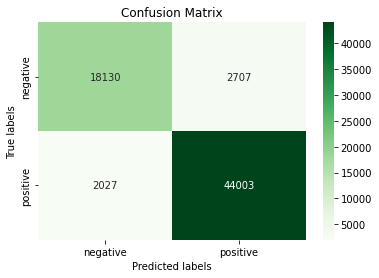

In [21]:
# confusion matrix
# svr_lin_predictions=svr_lin.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,svr_lin_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Greens');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [33]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers 
ranfrst_predictions = rfModel.predict(X_test_tvec)
report = classification_report(Y_test,ranfrst_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("red", as_cmap=True)
data_report.style.background_gradient(cmap=cm)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.3s finished


,precision,recall,f1-score,support
0,0.970000,0.880000,0.920000,19228.000000
1,0.970000,0.990000,0.980000,63528.000000
accuracy,0.970000,0.970000,0.970000,0.970000
macro avg,0.970000,0.940000,0.950000,82756.000000
weighted avg,0.970000,0.970000,0.970000,82756.000000


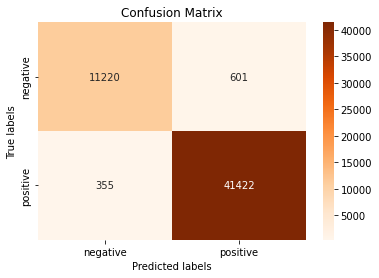

In [55]:
# confusion matrix
# ranfrst_predictions=random_forest.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,ranfrst_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Oranges');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [56]:
rfProba = rfModel.predict_proba(X_test_tvec)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.1s finished


In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(Y_test, rfProba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

ValueError: y should be a 1d array, got an array of shape (53598, 2) instead.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.2s finished


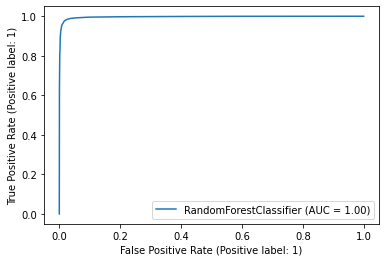

In [63]:
from sklearn.metrics import RocCurveDisplay
rf_disp = RocCurveDisplay.from_estimator(rfModel, X_test_tvec, Y_test)
plt.show()

In [60]:
rfProba

array([[0.99, 0.01],
       [0.95, 0.05],
       [0.  , 1.  ],
       ...,
       [0.96, 0.04],
       [0.  , 1.  ],
       [0.96, 0.04]])

In [26]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers 
lr_predictions = lrModel.predict(X_test_tvec)
report = classification_report(Y_test,lr_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("purple", as_cmap=True)
data_report.style.background_gradient(cmap=cm)



,precision,recall,f1-score,support
0,0.890000,0.850000,0.870000,20837.000000
1,0.930000,0.950000,0.940000,46030.000000
accuracy,0.920000,0.920000,0.920000,0.920000
macro avg,0.910000,0.900000,0.910000,66867.000000
weighted avg,0.920000,0.920000,0.920000,66867.000000


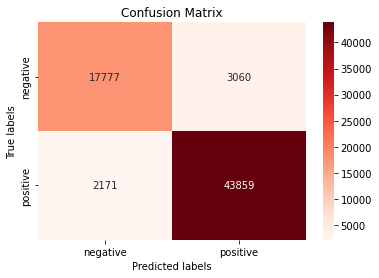

In [40]:
# confusion matrix
# lr_predictions=lr.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,lr_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Reds');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [28]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers 
nbm_predictions = nbModel.predict(X_test_tvec)
report = classification_report(Y_test,nbm_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("blue", as_cmap=True)
data_report.style.background_gradient(cmap=cm)



,precision,recall,f1-score,support
0,0.890000,0.730000,0.800000,20837.000000
1,0.890000,0.960000,0.920000,46030.000000
accuracy,0.890000,0.890000,0.890000,0.890000
macro avg,0.890000,0.850000,0.860000,66867.000000
weighted avg,0.890000,0.890000,0.890000,66867.000000


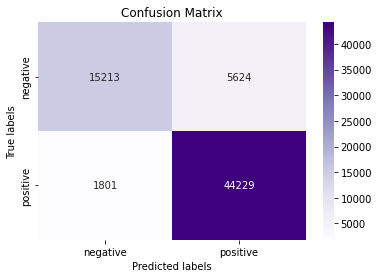

In [29]:
# confusion matrix
# nbm_predictions=nbm.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,nbm_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Purples');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [33]:
demo_review1 = np.array(['three days of use and it broke very disappointed in this product it worked perfectly for exactly three days and could not be resuscitated it was very inexpensive so i did not want to pay half again the price to ship it back for an exchange so the company would do nothing when they sent me an inquiry as to product satisfaction'])
demo_review2 = np.array(['''It's a very good product has good clarity, adequate refresh rate and is pretty reasonable priced. '''])
demo_review_X_test1 = tvec.transform(demo_review1)
demo_review_X_test2 = tvec.transform(demo_review2)
print("SVC")
print(svcModel.predict(demo_review_X_test1))
print(svcModel.predict(demo_review_X_test2))
print("Random Forest")
print(rfModel.predict(demo_review_X_test1))
print(rfModel.predict(demo_review_X_test2))
print("Linear Regression")

print(lrModel.predict(demo_review_X_test1))
print(lrModel.predict(demo_review_X_test2))
print("Naive ")

print(nbModel.predict(demo_review_X_test1))
print(nbModel.predict(demo_review_X_test2))

SVC
[0]
[1]
Random Forest
[0]
[1]
Linear Regression
[0]
[1]
Naive 
[1]
[1]


In [69]:
X_test.iloc[:1]

218813    do not meet expectation very bad quality so do...
Name: ReviewsLemmatized1, dtype: object

In [82]:
X_test_tvec

<53598x37120 sparse matrix of type '<class 'numpy.float64'>'
	with 465670 stored elements in Compressed Sparse Row format>

In [73]:
tvec.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': 'ascii',
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}